#Handle imbalance using under sampling

#Oversampling (blind copy) (SMOTE - 

#Ensemble

#Focal loss

#Python coding starts

#Code - Undersampling

#Code - Oversampling(Blind copy)

#Code - Oversampling(SMOTE)

#Code - Ensemble

#### Import necessary library

In [65]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [66]:
# From here I can see customer id is not required. So ill drop this column
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3121,8679-JOEVF,Female,1,No,No,16,Yes,No,DSL,No,...,No,Yes,Yes,No,Month-to-month,No,Electronic check,59.40,1023.9,Yes
490,3552-CTCYF,Male,0,Yes,Yes,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),104.80,6597.25,No
1455,1621-YNCJH,Female,0,Yes,No,36,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,Yes,Two year,Yes,Credit card (automatic),106.05,3834.4,No
6184,3413-CSSTH,Male,0,No,No,41,Yes,Yes,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),55.70,2237.55,No
5585,4667-OHGKG,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.30,19.3,Yes


In [67]:
df.shape

(7043, 21)

# Data Exploration 
From here we will modify our data for machine learning modelf

In [68]:
df.drop('customerID', axis='columns', inplace = True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [69]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [70]:
#string value, so have to make it numeric
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [71]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [72]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [ ]:
pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()

In [73]:
# Here if a space found, it will be ignored.
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [74]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [75]:
df.iloc[488].TotalCharges

' '

In [76]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [77]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [78]:
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [79]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\AJ\AppData\Local\Temp\ipykernel_11084\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [80]:
df1.TotalCharges.dtypes

dtype('float64')

### Histogram between tenure and churn

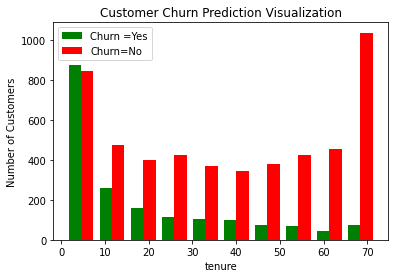

In [81]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes, tenure_churn_no], color = ['green', 'red'], label=['Churn =Yes', 'Churn=No'])
plt.legend()


### Monthly Charges Histogram

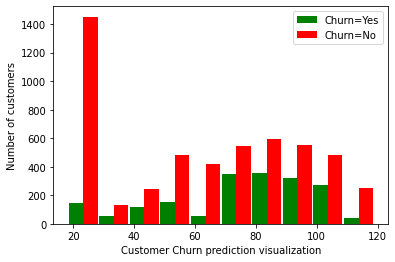

In [82]:
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of customers")
plt.xlabel("Customer Churn prediction visualization")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69,89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green', 'red'], label = ['Churn=Yes', 'Churn=No'])
plt.legend()

##### Find unique object values so that I can make it into 0 to 1 value

In [83]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')

In [91]:
print_unique_col_values(df1)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [92]:
#Here I will not use one hot encoding because it's only two value. If it is more then 2 value I would have used it.
df1.replace('No internet service', 'No', inplace = True)
df1.replace('No phone service', 'No', inplace = True)

C:\Users\AJ\AppData\Local\Temp\ipykernel_11084\1330973912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace = True)
C:\Users\AJ\AppData\Local\Temp\ipykernel_11084\1330973912.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace = True)


In [93]:
print_unique_col_values(df1)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [94]:
#Replace yes and no to 1,0.
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                 'StreamingTV', 'StreamingMovies', 'PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\AJ\AppData\Local\Temp\ipykernel_11084\3081892482.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [95]:
#now print unique values.
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [96]:
#see the values after manupulation!
df1.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6664,1,0,0,0,36,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Bank transfer (automatic),104.80,3886.45,0
2973,1,0,1,1,62,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,100.15,6283.30,1
4831,1,0,0,0,18,0,0,DSL,1,1,0,1,0,0,One year,1,Mailed check,40.20,711.95,0


In [97]:
df1['gender'].replace({'Female':1, 'Male':0},inplace=True)

C:\Users\AJ\AppData\Local\Temp\ipykernel_11084\940752256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1, 'Male':0},inplace=True)


In [98]:
df1['gender'].unique()

array([1, 0], dtype=int64)

## One Hottttttttt Encoding!! ^_^

In [99]:
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [100]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4605,0,0,1,0,63,1,1,0,1,0,...,1,0,0,0,0,1,0,0,0,1
5479,1,0,0,0,9,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3076,1,0,0,0,6,1,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0
1748,1,0,1,0,54,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [101]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

# Data Scaling

In [102]:
cols_to_scale = ['tenure', 'MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [103]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5155,1,0,0,0,0.408451,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
693,1,0,0,0,0.028169,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
2218,1,0,1,1,0.985915,1,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0


In [104]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

# Train_Test_Split

In [105]:
x = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [106]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 15, stratify = y)

In [107]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [108]:
x_train.shape

(5625, 26)

In [109]:
x_test.shape

(1407, 26)

In [110]:
y_test.value_counts()

0    1033
1     374
Name: Churn, dtype: int64

In [111]:
x_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2446,1,0,0,0,0.239437,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2220,0,0,1,0,1.000000,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
5131,1,0,1,0,0.605634,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4372,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4687,0,0,1,0,0.295775,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2385,1,0,0,1,0.028169,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
6773,0,1,1,0,0.507042,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [112]:
len(x_train.columns)

26

# Neural Network

In [113]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
    
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 14s 9ms/step - loss: 0.6301 - accuracy: 0.6350
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4573 - accuracy: 0.7787
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4309 - accuracy: 0.7913
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4226 - accuracy: 0.7934
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4185 - accuracy: 0.7973
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4167 - accuracy: 0.7995
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4160 - accuracy: 0.8034
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4149 - accuracy: 0.8025
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4124 - accuracy: 0.8041
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4124 - accur

In [114]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4503 - accuracy: 0.7903


[0.45031997561454773, 0.7903340458869934]

In [116]:
yp = model.predict(x_test)
yp[:5]

array([[0.11422998],
       [0.00087237],
       [0.0138002 ],
       [0.0705314 ],
       [0.72806203]], dtype=float32)

In [117]:
y_test[:10]

6581    0
2317    0
3522    0
4533    0
162     0
6621    0
816     1
297     0
5518    1
3558    0
Name: Churn, dtype: int64

In [118]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [119]:
y_pred[:10]

[0, 0, 0, 0, 1, 0, 1, 1, 0, 0]

In [120]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



### Confusion matrix

Text(69.0, 0.5, 'Truth')

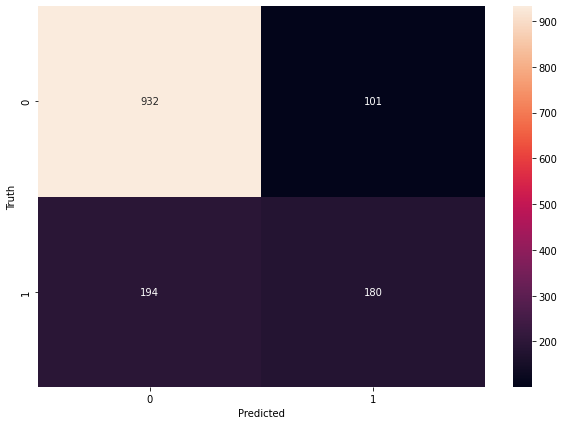

In [121]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Model building(ANN)

In [122]:
from tensorflow_addons import losses

ModuleNotFoundError: No module named 'tensorflow_addons'

# ANN Model

In [123]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [125]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [127]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 2s 2ms/step - loss: 0.5240 - accuracy: 0.7349
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4360 - accuracy: 0.7863
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4263 - accuracy: 0.7948
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.7973
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.8021
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4172 - accuracy: 0.8012
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8020
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4126 - accuracy: 0.8050
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4108 - accuracy: 0.8068
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4088 - accura

# Method 1: Undersampling

In [128]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [129]:


# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())



Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [130]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [132]:
# Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [133]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 4s 5ms/step - loss: 0.6208 - accuracy: 0.6652
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5143 - accuracy: 0.7629
Epoch 3/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4991 - accuracy: 0.7635
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4916 - accuracy: 0.7615
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4845 - accuracy: 0.7672
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4825 - accuracy: 0.7689
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4779 - accuracy: 0.7689
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4777 - accuracy: 0.7692
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4740 - accuracy: 0.7682
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4714 - accuracy: 0.7773
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8187
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.8174
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3919 - accuracy: 0.8201
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3921 - accuracy: 0.8207
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3905 - accuracy: 0.8224
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3905 - accuracy: 0.8184
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.8177
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3874 - accuracy: 0.8278
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3879 - accuracy: 0.8231
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3859 - accuracy: 0.8234
Epoch 93/100


##### See!!! f1 score improved!!

# Method2: Oversampling

In [134]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [135]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [136]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [137]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 4ms/step - loss: 0.5386 - accuracy: 0.7438
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4868 - accuracy: 0.7632
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4801 - accuracy: 0.7691
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4768 - accuracy: 0.7707
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4729 - accuracy: 0.7742
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4701 - accuracy: 0.7772
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4665 - accuracy: 0.7794
Epoch 8/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4651 - accuracy: 0.7770
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4629 - accuracy: 0.7782
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4602 - accura

### Method3: SMOTE

In [139]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']